<a href="https://colab.research.google.com/github/sfurlong14/MachineLearningCreditProject/blob/main/CreditRiskPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION

In [ ]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split


print("\n---Libraries loaded")


---Libraries loaded


In [ ]:
df = pd.read_csv('Train_CREDIT_RISK.csv')
print(df)

     clientid  income  age   loan  default
0           1 66155.9 59.0 8106.5        0
1           2 34415.2 48.1 6564.7        0
2           3 57317.2 63.1 8021.0        0
3           4 42709.5 45.8 6103.6        0
4           5 66952.7 18.6 8770.1        1
..        ...     ...  ...    ...      ...
195       202 38053.6 26.2 6110.6        1
196       203 64718.7 37.3 1485.1        0
197       204 43159.1 62.4 4350.0        0
198       205 29445.5 28.4 1758.9        0
199       206 25817.4 37.9 4115.5        0

[200 rows x 5 columns]


In [ ]:
df.columns = ['clientid', 'income', 'age', 'loan', 'default']

In [ ]:
#Split into Train/Test Data
X = df.loc[:, df.columns != 'default']
y = df.loc[:, df.columns == 'default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

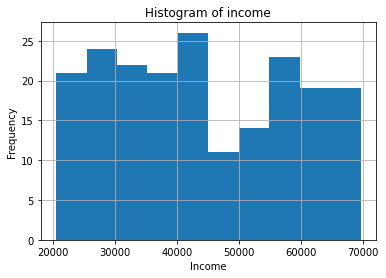

In [ ]:
df.income.hist()
plt.title('Histogram of income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

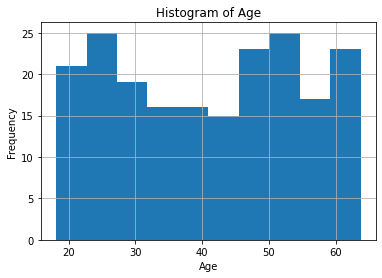

In [ ]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

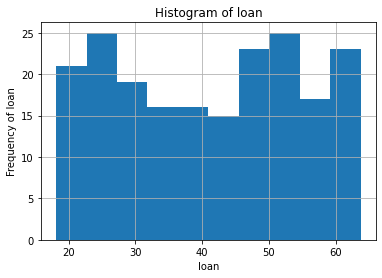

In [ ]:
df.age.hist()
plt.title('Histogram of loan')
plt.xlabel('loan')
plt.ylabel('Frequency of loan')
plt.show()

In [ ]:
data_understanding_table = df.describe()
print(data_understanding_table)

       clientid  income   age    loan  default
count     200.0   200.0 200.0   200.0    200.0
mean      105.8 43987.2  41.1  4306.1      0.2
std        58.9 14388.3  13.7  2942.7      0.4
min         1.0 20542.4  18.1     8.0      0.0
25%        56.8 31336.5  28.6  1800.4      0.0
50%       106.5 42033.1  42.9  4214.2      0.0
75%       156.2 57650.8  53.3  5998.0      0.0
max       206.0 69579.9  63.7 12701.6      1.0


In [ ]:
df.isnull().any().any()

False

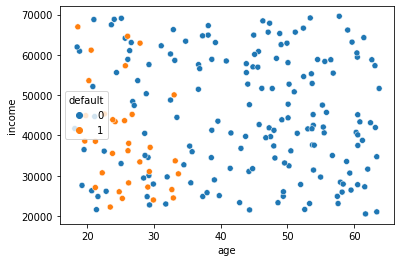

In [ ]:
plot = sns.scatterplot(x = "age", 
                      y = "income",
                      hue = "default",
                      data = df)

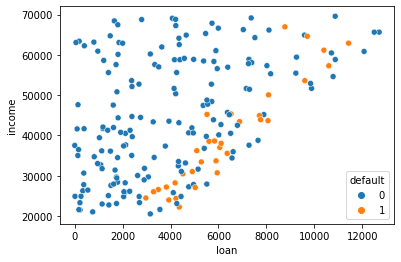

In [ ]:
plot = sns.scatterplot(x = "loan", 
                      y = "income",
                      hue = "default",
                      data = df)

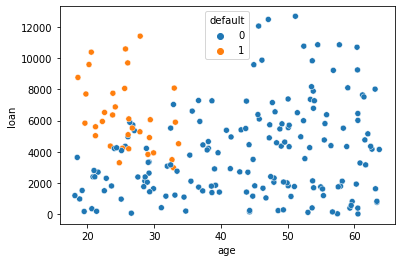

In [ ]:
plot = sns.scatterplot(x = "age", 
                      y = "loan",
                      hue = "default",
                      data = df)

In [ ]:
model = sm.Logit(y_train,X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.109297
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  140
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                            3
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.7335
Time:                        16:38:53   Log-Likelihood:                -15.302
converged:                       True   LL-Null:                       -57.416
Covariance Type:            nonrobust   LLR p-value:                 3.798e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
clientid       0.0289      0.012      2.448      0.014       0.006       0.052
income        -0.0001   5.75

In [ ]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
print(model_odds)

          OR  z-value  2.5%  97.5%
clientid 1.0      0.0   1.0    1.1
income   1.0      0.1   1.0    1.0
age      0.8      0.0   0.7    0.9
loan     1.0      0.0   1.0    1.0



---Confusion Matrix
[[43  4]
 [ 4  9]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


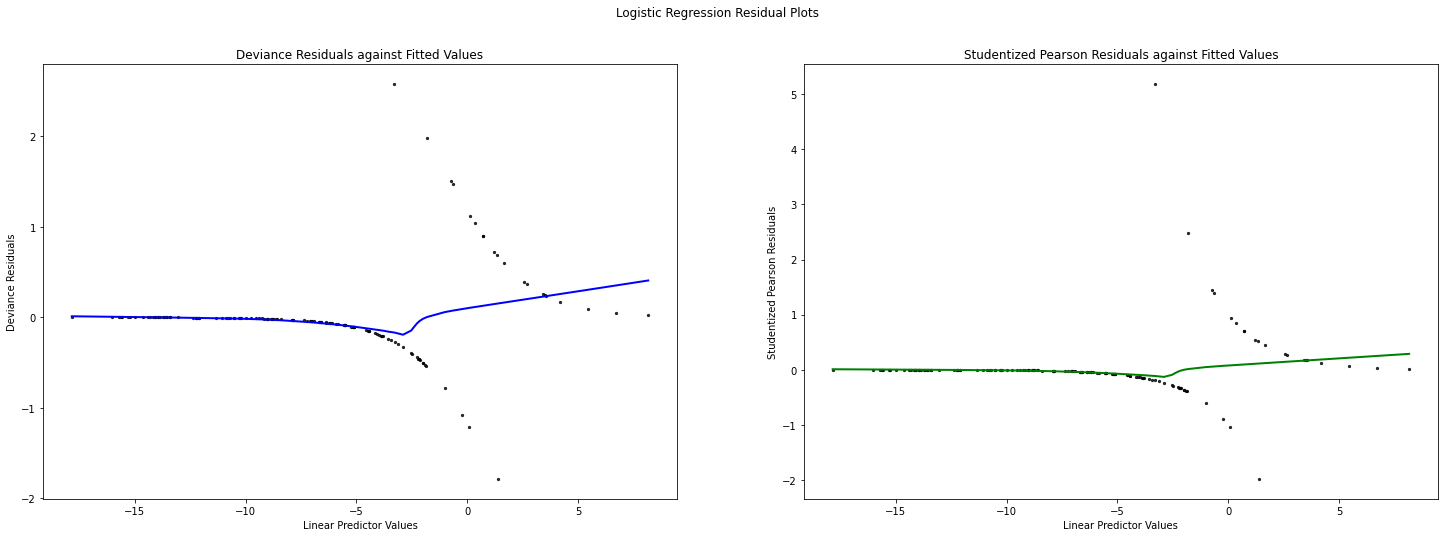

In [ ]:
#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test) > 0.5  # this line is updated from the recording

confusion_matrix_my = confusion_matrix(y_test, y_pred)
print(confusion_matrix_my)

## Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(1,2, figsize=(25, 8))
plt.suptitle("Logistic Regression Residual Plots")

# Deviance Residuals
sns.regplot(model.fittedvalues, model.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)
axL.set_title("Deviance Residuals against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(model.fittedvalues, model.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)
axR.set_title("Studentized Pearson Residuals against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

# save figure (for homework), or screen capture
plt.savefig('resid.png', transparent=True)

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Fit the Model with Sklearn
logreg = LogisticRegression(fit_intercept = True)    # default intercept = true
#logreg = LogisticRegression(fit_intercept = False)    

logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)

print("Modeling complete")

Modeling complete


In [ ]:
#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(logreg.score(X_test, y_test))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#An attempt at a regression model summary
print("\n---An attempt at a regression model summary")

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

      
regression_results(y_test, y_pred)


---Test Set Accuracy
0.8833333333333333

---Confusion Matrix
[[42  5]
 [ 2 11]]

---Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.69      0.85      0.76        13

    accuracy                           0.88        60
   macro avg       0.82      0.87      0.84        60
weighted avg       0.90      0.88      0.89        60


---An attempt at a regression model summary
explained_variance:  0.3273
mean_squared_log_error:  0.0561
r2:  0.3126
MAE:  0.1167
MSE:  0.1167
RMSE:  0.3416


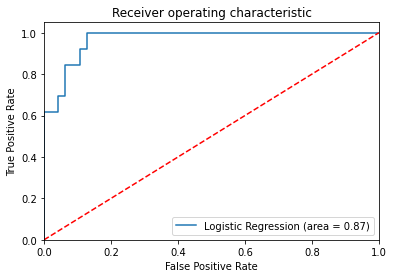

In [ ]:
#Make the Roc Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', transparent=True)
plt.show()


In [ ]:
#title Load the imports

# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


In [ ]:
train_df = pd.read_csv("Train_CREDIT_RISK.csv")
test_df = pd.read_csv("/content/Test_Credit_RISK.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set

train_df.head()

,clientid,income,age,loan,default
24,28,45727.5,55.8,6376.8,0
127,134,23122.1,53.3,4263.5,0
25,30,58842.9,54.5,10871.2,0
11,12,59436.8,60.5,9254.2,0
18,20,58887.4,26.1,4965.5,0


In [ ]:
# Calculate the Z-scores of each column in the training set and
# write those Z-scores into a new pandas DataFrame named train_df_norm.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

# Examine some of the values of the normalized training set. Notice that most 
# Z-scores fall between -2 and +2.
train_df_norm.head()

,clientid,income,age,loan,default
24,-1.3,0.1,1.1,0.7,-0.4
127,0.5,-1.5,0.9,-0.0,-0.4
25,-1.3,1.0,1.0,2.2,-0.4
11,-1.6,1.1,1.4,1.7,-0.4
18,-1.5,1.0,-1.1,0.2,-0.4


In [ ]:
# Calculate the Z-scores of each column in the test set and
# write those Z-scores into a new pandas DataFrame named test_df_norm.
test_df_mean = test_df.mean()
test_df_std  = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std

In [ ]:
threshold = 0
train_df_norm["Will_defualt"] = (train_df["default"] > threshold).astype(float)
test_df_norm["Will_defualt"] = (test_df["default"] > threshold).astype(float) 


In [ ]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# Create a numerical feature column to represent median_income.
median_income = tf.feature_column.numeric_column("income")
feature_columns.append(median_income)

# Create a numerical feature column to represent total_rooms.
tr = tf.feature_column.numeric_column("age")
feature_columns.append(tr)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_layer = layers.DenseFeatures(feature_columns)

# Print the first 3 and last 3 rows of the feature_layer's output when applied
# to train_df_norm:
feature_layer(dict(train_df_norm))

<tf.Tensor: shape=(200, 2), dtype=float32, numpy=
array([[ 1.0796263 ,  0.12095287],
       [ 0.8948653 , -1.4501451 ],
       [ 0.98258865,  1.0324887 ],
       [ 1.4178417 ,  1.0737693 ],
       [-1.0936366 ,  1.0355792 ],
       [-1.0917815 , -0.53973734],
       [ 0.2754029 ,  0.90569067],
       [ 1.3116078 ,  1.540752  ],
       [ 0.937839  , -0.8732393 ],
       [-1.2424326 ,  1.7253367 ],
       [-0.46107838,  1.3486297 ],
       [ 0.41619268, -0.31593162],
       [ 1.6103225 ,  0.9264496 ],
       [-0.18007165, -0.6588439 ],
       [-1.2858515 , -1.5108812 ],
       [ 0.60870224, -1.2474138 ],
       [-0.85842687, -0.89939725],
       [ 1.4211254 , -1.1254919 ],
       [-1.2736262 ,  1.6317384 ],
       [-1.1204785 ,  0.9249894 ],
       [-1.5643077 , -0.37263143],
       [-0.30711982,  0.8750572 ],
       [-1.0732685 ,  1.1859092 ],
       [ 0.9022639 ,  1.7492814 ],
       [ 1.445324  , -0.04232481],
       [ 1.2195501 ,  1.7787238 ],
       [ 1.4217167 ,  0.08074138],
     

In [ ]:
#title Define the functions that create and train a model.
def create_model(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(feature_layer)

  model.add(layers.Dense(10, activation='relu'))  # optional, add a 5-neuron hidden layer
  model.add(layers.Dense(10, activation='relu'))  # optional, add a 5-neuron hidden layer
  
  # Funnel the regression value through a sigmoid function.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)
  

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.  Notice that we're using a different loss
  # function for classification than for regression.    
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        


print("Defined the create_model function.")  

Defined the create_model function.


In [ ]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the train_model function.")

Defined the train_model function.


In [ ]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


Epoch 1/100
Consider rewriting this model with the Functional API.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Consider rewriting this model with the Functional API.
2/2 [==============================] - 1s 7ms/step - loss: 0.7155 - accuracy: 0.1650
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6988 - accuracy: 0.1650
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.1650
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6785 - accuracy: 0.1650
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6705 - accuracy: 0.1650
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6633 - accuracy: 0.1650
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 0.6565 - accuracy: 0.1650
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 0.6500 - accuracy: 0.1650
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 0.6439 - accuracy: 0.1650
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 0.6380 - a

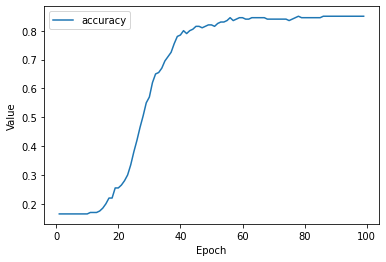

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 100
batch_size = 100
label_name = "Will_defualt"
classification_threshold = 0.35

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [ ]:
features = {name:np.array(value) for name, value in test_df_norm.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

Consider rewriting this model with the Functional API.
18/18 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8161


[0.33002451062202454, 0.8160535097122192]

In [ ]:
from sklearn.metrics import confusion_matrix

# predictions = my_model.predict(features).flatten() 
predictions = my_model.predict(features).flatten() > classification_threshold

print(predictions)

# cm = confusion_matrix(y_true=label, y_pred=label)
cm = confusion_matrix(y_true=label, y_pred=predictions)

print(cm)

Consider rewriting this model with the Functional API.
[False False False ...  True False False]
[[1344  200]
 [ 130  120]]


Epoch 1/100
Consider rewriting this model with the Functional API.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Consider rewriting this model with the Functional API.
2/2 [==============================] - 1s 8ms/step - loss: 0.6587 - accuracy: 0.1700 - precision: 0.1624 - recall: 0.9697
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6378 - accuracy: 0.2450 - precision: 0.1758 - recall: 0.9697
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6239 - accuracy: 0.2800 - precision: 0.1829 - recall: 0.9697
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6127 - accuracy: 0.2950 - precision: 0.1824 - recall: 0.9394
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6031 - accuracy: 0.3050 - precision: 0.1807 - recall: 0.9091
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 0.5944 - accuracy: 0.3350 - precision: 0.1875 - recall: 0.9091
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 0.5866 - accuracy: 0.3550 - precision: 0.1883 - recall: 0.8788
Epoch 8/100
2/2 [

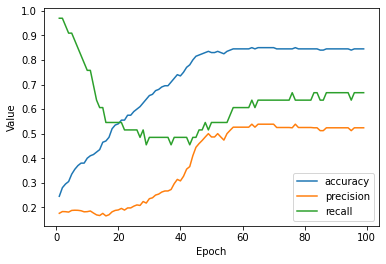

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 100
batch_size = 100
classification_threshold = 0.35
label_name = "Will_defualt"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)


# The new graphs suggest that precision and recall are 
# somewhat in conflict. That is, improvements to one of
# those metrics may hurt the other metric.

Epoch 1/100
Consider rewriting this model with the Functional API.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Consider rewriting this model with the Functional API.
2/2 [==============================] - 1s 8ms/step - loss: 0.7747 - accuracy: 0.1650 - precision: 0.1650 - recall: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.7540 - accuracy: 0.1650 - precision: 0.1650 - recall: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 0.7399 - accuracy: 0.1650 - precision: 0.1650 - recall: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 0.7280 - accuracy: 0.1650 - precision: 0.1650 - recall: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7174 - accuracy: 0.1650 - precision: 0.1650 - recall: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 0.7075 - accuracy: 0.1650 - precision: 0.1650 - recall: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.1650 - precision: 0.1650 - recall: 1.0000
Epoch 8/100
2/2 [=

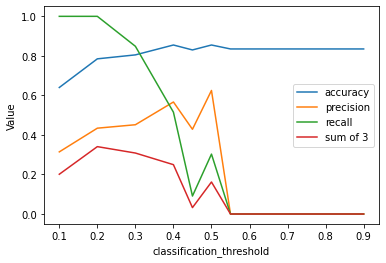

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 100
batch_size = 100
# classification_threshold = 0.52
label_name = label_name = "Will_defualt"

# Here is the updated definition of METRICS:

ACC_list = []
PREC_list = []
RECALL_list = []
SUMMARY_list = []

classifs_to_try = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
# classifs_to_try = [0.5, 0.6]

for classification_threshold in classifs_to_try:
  METRICS = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                        threshold=classification_threshold),
        tf.keras.metrics.Precision(thresholds=classification_threshold,
                                  name='precision' 
                                  ),
        tf.keras.metrics.Recall(thresholds=classification_threshold,
                                name="recall"),
  ]

  # Establish the model's topography.
  my_model = create_model(learning_rate, feature_layer, METRICS)

  # Train the model on the training set.
  epochs_not_used, hist = train_model(my_model, train_df_norm, epochs, label_name, batch_size)
  
  x=hist['accuracy']
  x=x[len(x)-1] #  last element is the final value
  ACC_list.append(x)  

  y=hist['precision']
  y=y[len(y)-1] #  last element is the final value
  PREC_list.append(y)

  z=hist['recall']
  z=z[len(z)-1] #  last element is the final value
  RECALL_list.append(z)
  
  a=x*y*z
  SUMMARY_list.append(a)


plt.figure()
plt.xlabel("classification_threshold")
plt.ylabel("Value")

plt.plot(classifs_to_try, ACC_list, label='accuracy')
plt.plot(classifs_to_try, PREC_list, label='precision')
plt.plot(classifs_to_try, RECALL_list, label='recall')

plt.plot(classifs_to_try, SUMMARY_list, label='sum of 3')

 
plt.legend()

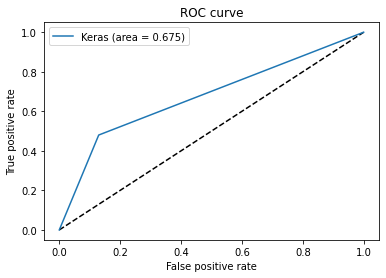

In [ ]:
from sklearn.metrics import roc_curve

# y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(label, predictions)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Epoch 1/100
Consider rewriting this model with the Functional API.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Consider rewriting this model with the Functional API.
2/2 [==============================] - 1s 9ms/step - loss: 0.7070 - auc: 0.2013
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6849 - auc: 0.2386
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6698 - auc: 0.2688
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 0.6573 - auc: 0.3050
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6461 - auc: 0.3378
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 0.6361 - auc: 0.3736
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6268 - auc: 0.3979
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6180 - auc: 0.4344
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6094 - auc: 0.4675
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6013 - auc: 0.4978
Epoch 11/100
2/2 [================

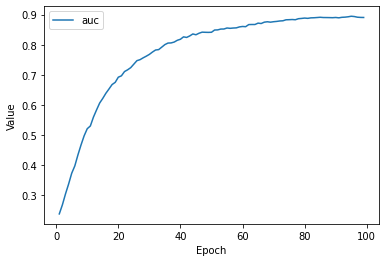

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 100
batch_size = 100
label_name = "Will_defualt"

# AUC is a reasonable "summary" metric for 
# classification models.
# Here is the updated definition of METRICS to 
# measure AUC:
METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['auc'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)